# Data Cleaning, Exploration, and Visualization in Python

This notebook demonstrates:
1. Loading and exploring a real dataset
2. Cleaning and preparing data
3. Data visualization with matplotlib and seaborn
4. Comparing matplotlib and seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set style for better visualization
plt.style.use('ggplot')
%matplotlib inline

## 1. Loading and Exploring the Dataset

We'll use the California Housing dataset from sklearn

In [ ]:
# Load the dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Display basic information
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Basic statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 2. Data Cleaning and Preparation


Outliers in MedInc: 681


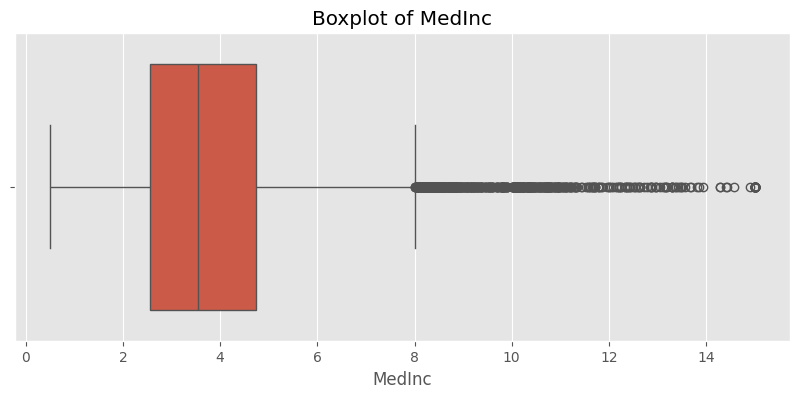


Outliers in HouseAge: 0


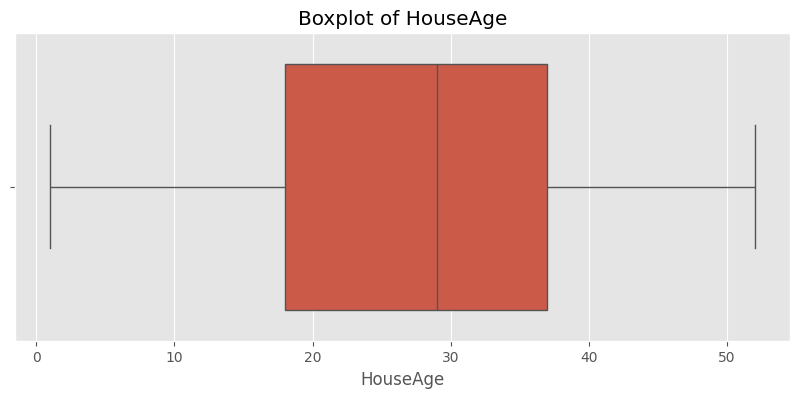


Outliers in AveRooms: 511


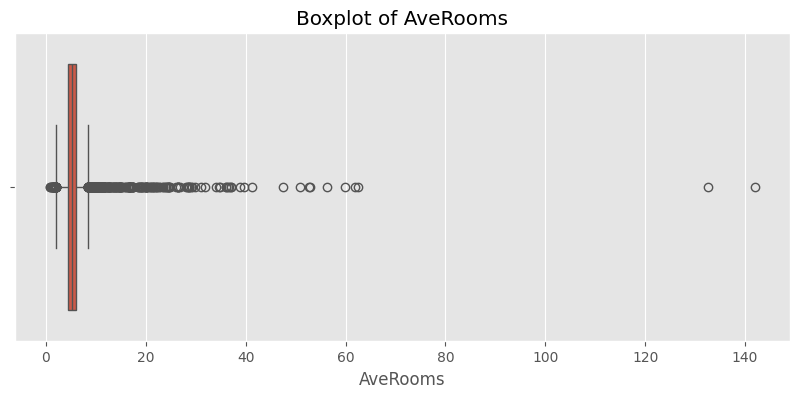


Outliers in AveBedrms: 1424


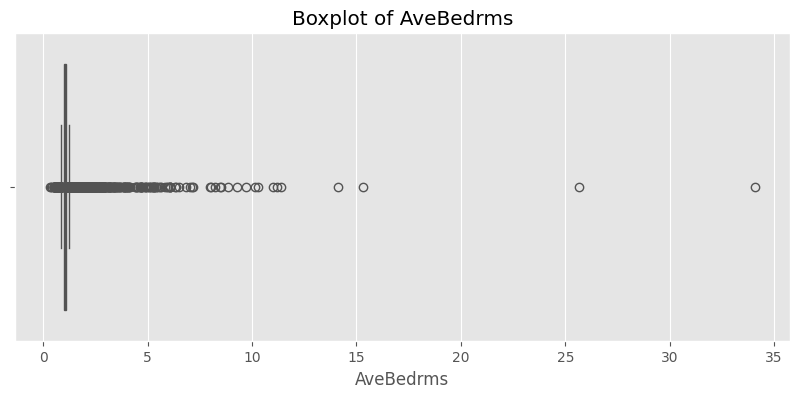


Outliers in Population: 1196


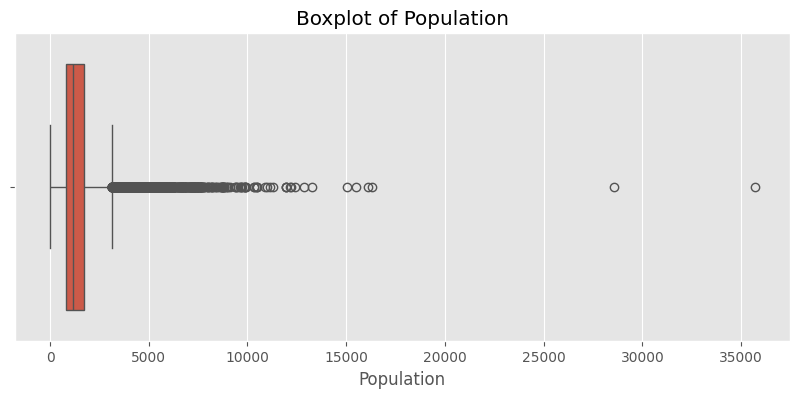


Outliers in AveOccup: 711


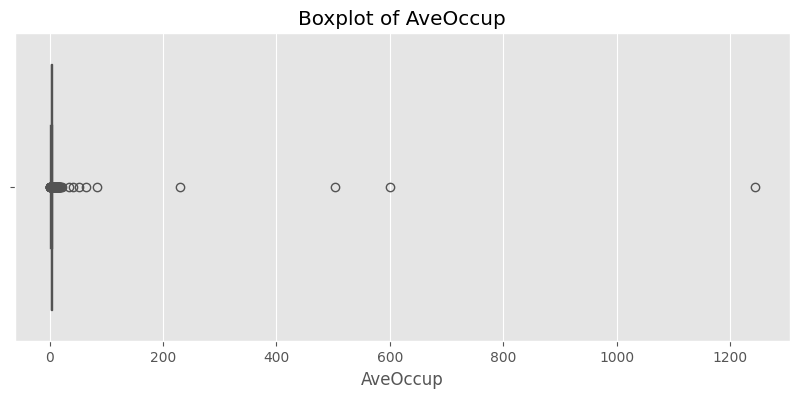


Outliers in Latitude: 0


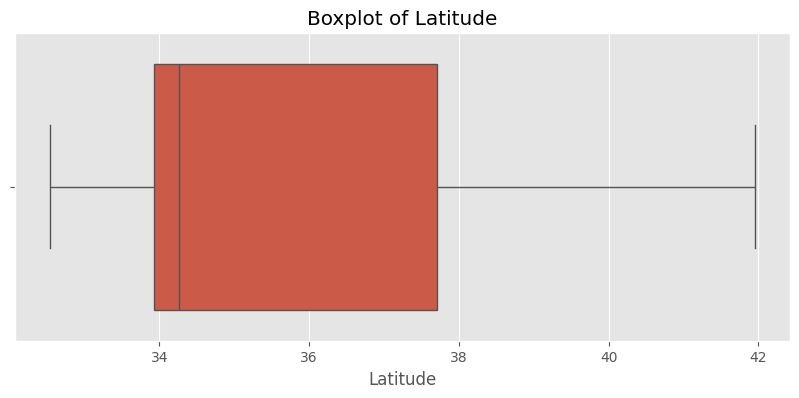


Outliers in Longitude: 0


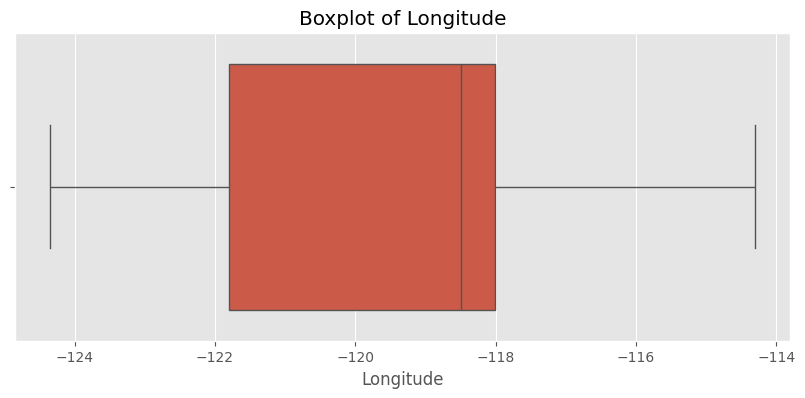


Outliers in MedHouseVal: 1071


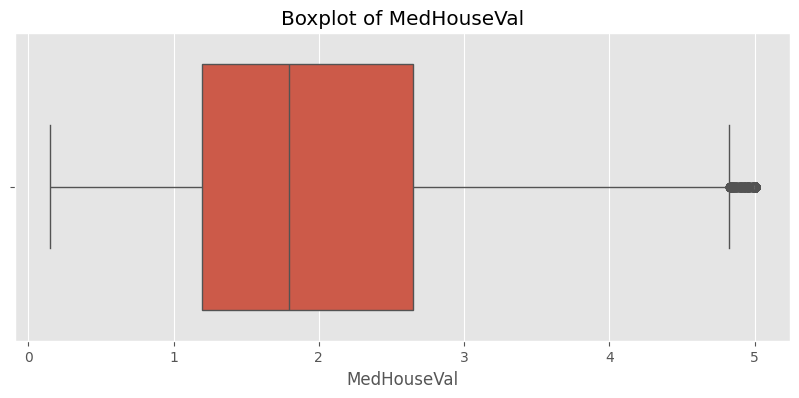

In [3]:
# Check for outliers
def detect_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nOutliers in {col}: {len(outliers)}")

        # Option to visualize outliers
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Detect outliers in numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
detect_outliers(data, numerical_cols)

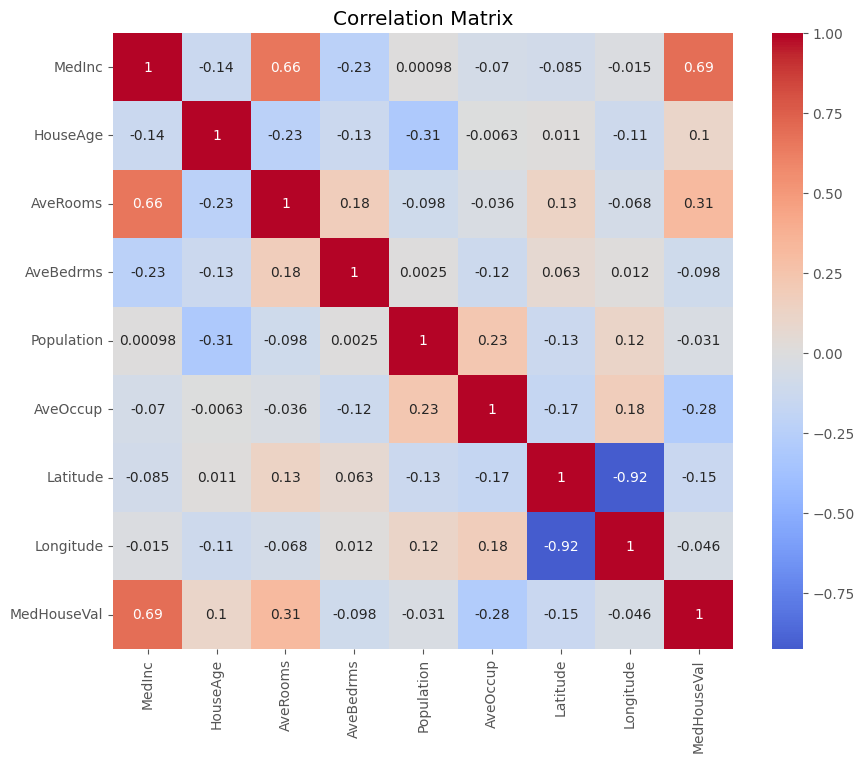

In [4]:
# Handle outliers - we'll cap them for this example
def cap_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df[col] = np.where(df[col] < lower_bound, lower_bound,
                          np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

data = cap_outliers(data, numerical_cols)

# Check correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 3. Data Visualization

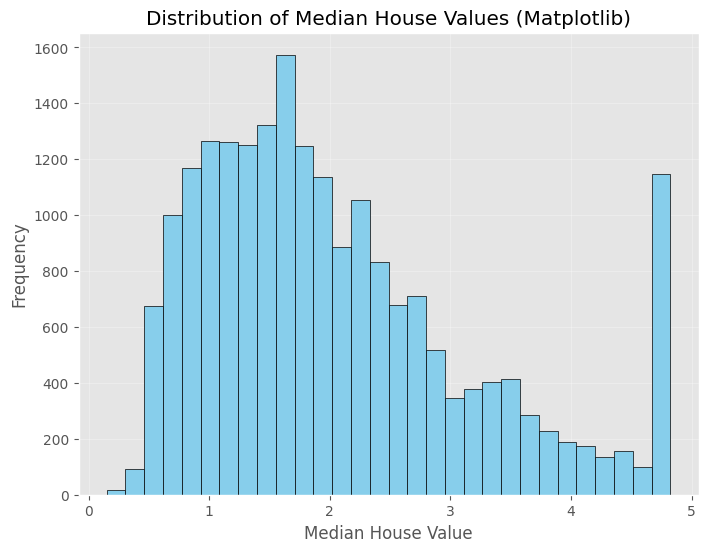

In [6]:
# Histogram with matplotlib
plt.figure(figsize=(8, 6))
plt.hist(data['MedHouseVal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Values (Matplotlib)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

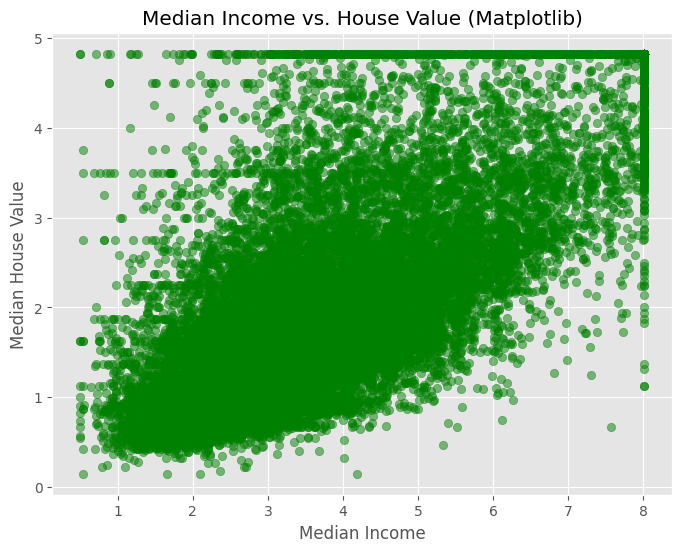

In [7]:
# Scatter plot with matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(data['MedInc'], data['MedHouseVal'], alpha=0.5, color='green')
plt.title('Median Income vs. House Value (Matplotlib)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

C:\Users\Ahmed Dief\AppData\Local\Temp\ipykernel_8808\2505259982.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  avg_values = data.groupby('HouseAge')['MedHouseVal'].mean().sort_values(ascending=False)[:10]


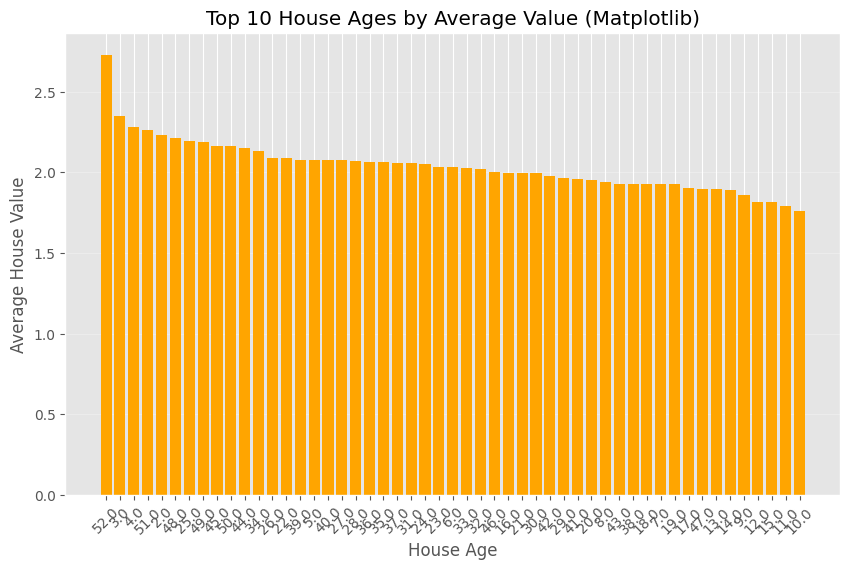

In [8]:
# Bar plot with matplotlib
avg_values = data.groupby('HouseAge')['MedHouseVal'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.bar(avg_values.index.astype(str), avg_values.values, color='orange')
plt.title('Top 10 House Ages by Average Value (Matplotlib)')
plt.xlabel('House Age')
plt.ylabel('Average House Value')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Seaborn Examples

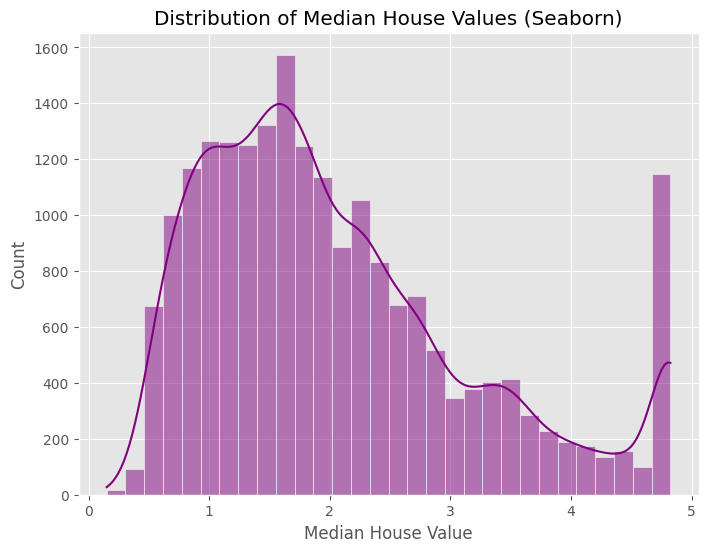

In [9]:
# Distribution plot with seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True, color='purple')
plt.title('Distribution of Median House Values (Seaborn)')
plt.xlabel('Median House Value')
plt.show()

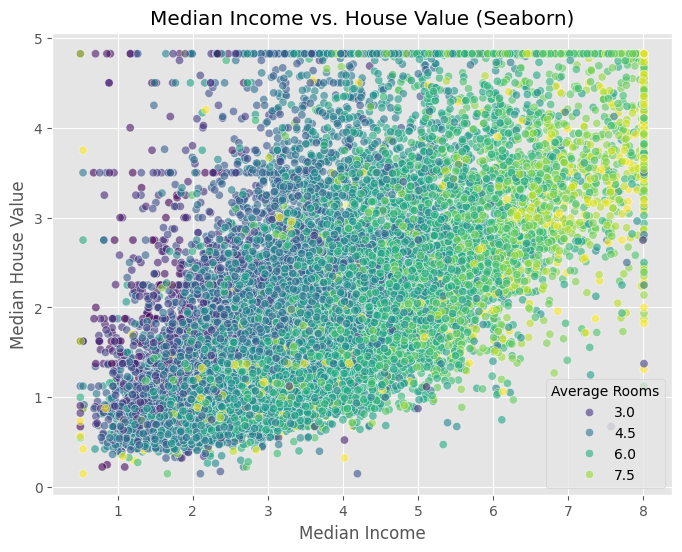

In [10]:
# Scatter plot with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=data, hue='AveRooms',
                palette='viridis', alpha=0.6)
plt.title('Median Income vs. House Value (Seaborn)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend(title='Average Rooms')
plt.show()

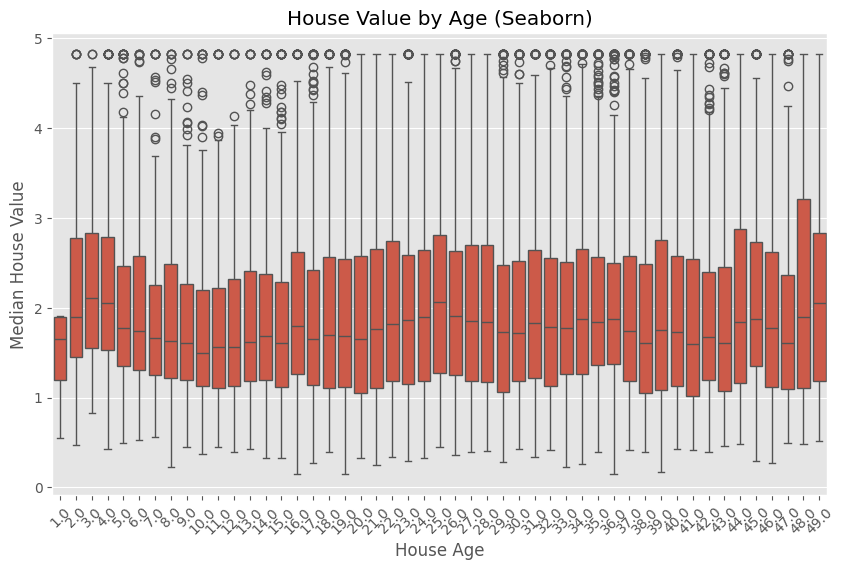

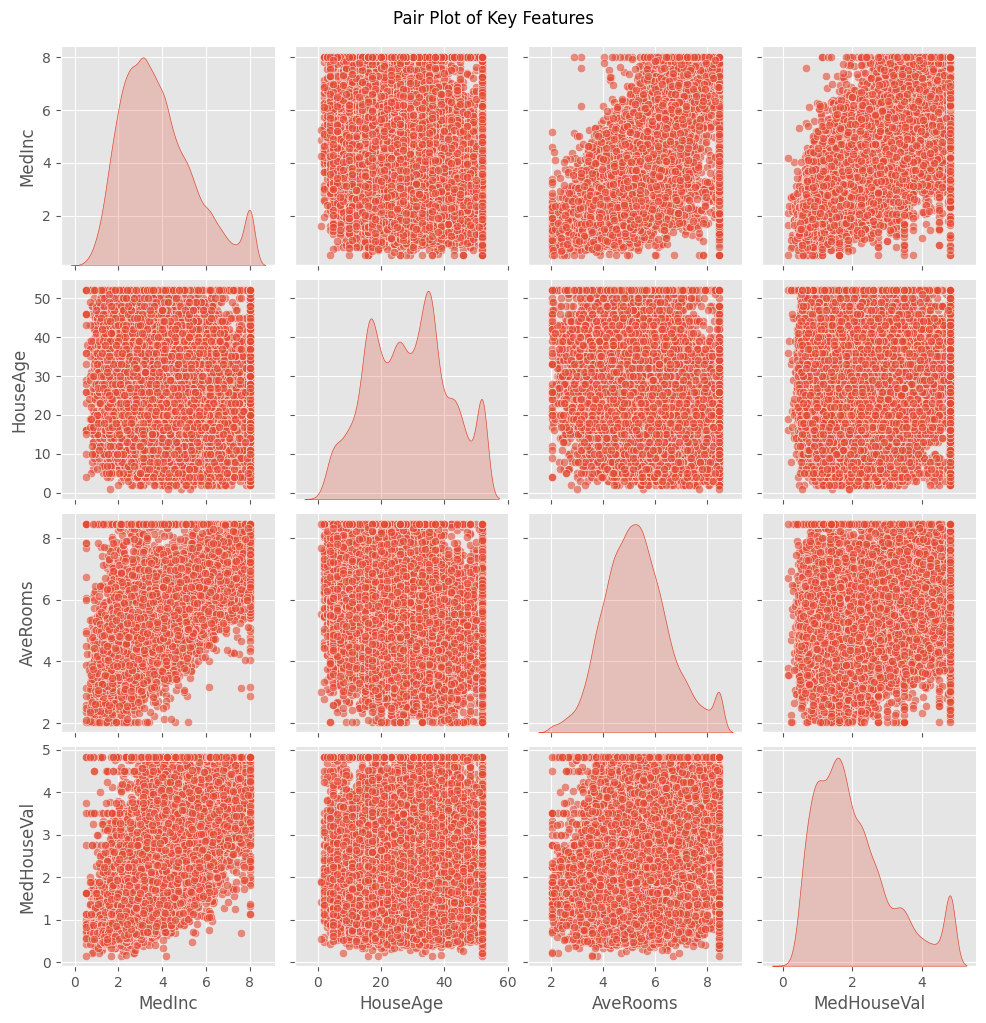

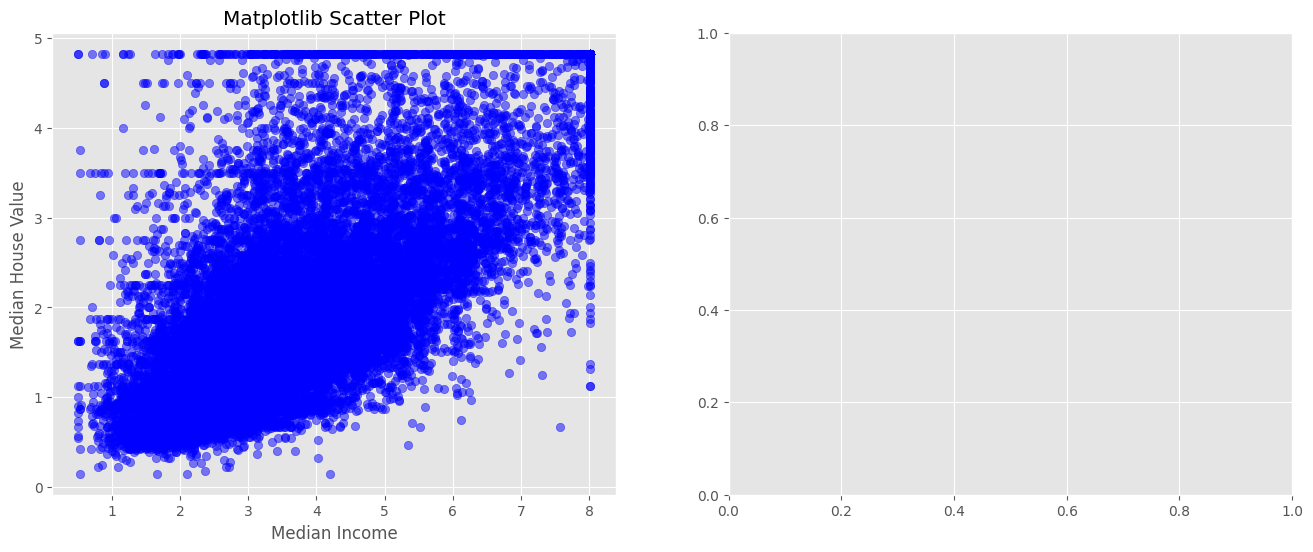

In [11]:
# Box plot with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseAge', y='MedHouseVal', data=data[data['HouseAge'] < 50])
plt.title('House Value by Age (Seaborn)')
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

# Pair plot with seaborn (subset of data for performance)
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# %% [markdown]
# ## 4. Matplotlib vs Seaborn Comparison

# %% [markdown]
# ### Key Differences:
#
# 1. **Ease of Use**:
#    - Matplotlib: More verbose, requires more code for complex plots
#    - Seaborn: Higher-level interface, simpler syntax for complex visualizations
#
# 2. **Default Styles**:
#    - Matplotlib: Basic default style
#    - Seaborn: More attractive default styles and color palettes
#
# 3. **Statistical Plots**:
#    - Matplotlib: Primarily basic plots
#    - Seaborn: Built-in support for statistical visualizations (violin plots, regression plots, etc.)
#
# 4. **Integration**:
#    - Seaborn is built on top of matplotlib and can be customized with matplotlib functions
#
# ### Side-by-Side Comparison:

# %%
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Matplotlib version
ax1.scatter(data['MedInc'], data['MedHouseVal'], alpha=0.5, color='blue')
ax1.set_title('Matplotlib Scatter Plot')
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Median House Value')
ax1.grid(True)

In [15]:
# Seaborn version
sns.scatterplot(x='MedInc', y='MedHouseVal', data=data, hue='AveRooms',
                palette='viridis', alpha=0.6, ax=ax2)
ax2.set_title('Seaborn Scatter Plot')
ax2.set_xlabel('Median Income')
ax2.set_ylabel('Median House Value')
ax2.legend(title='Average Rooms')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Frequency')

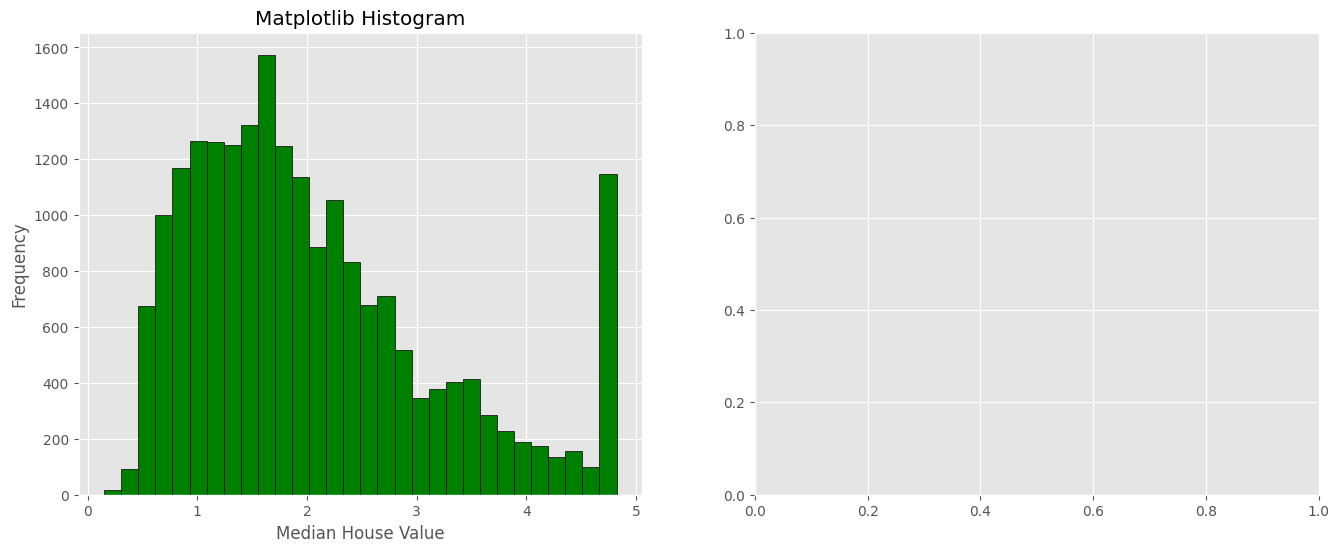

In [17]:
# %%
# Another comparison with distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Matplotlib version
ax1.hist(data['MedHouseVal'], bins=30, color='green', edgecolor='black')
ax1.set_title('Matplotlib Histogram')
ax1.set_xlabel('Median House Value')
ax1.set_ylabel('Frequency')

In [18]:
# Seaborn version
sns.histplot(data['MedHouseVal'], bins=30, kde=True, color='red', ax=ax2)
ax2.set_title('Seaborn Histogram with KDE')
ax2.set_xlabel('Median House Value')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Conclusion

- **Data Cleaning**: Essential step before analysis (handling missing values, outliers, etc.)
- **Exploration**: Understanding distributions, correlations, and patterns
- **Visualization**:
  - Use matplotlib for basic plots and full customization control
  - Use seaborn for statistical plots and quicker, more elegant visualizations

Both libraries are powerful and often used together, with seaborn for quick exploration and matplotlib for fine-tuned custom visualizations.